
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
np.random.seed(11)
%pylab inline
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

print (y_train [:5])

Populating the interactive namespace from numpy and matplotlib
[[ -9.2770254 ]
 [-13.81999642]
 [-39.91175409]
 [  5.99240036]
 [-23.50183192]]


We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


### Answers

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

Populating the interactive namespace from numpy and matplotlib
Mean squared error on the train data: 966.2629507059396
Mean squared error on the test data: 1204.2491913174892


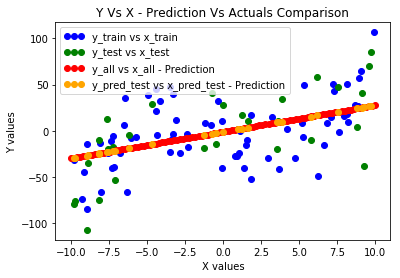

In [2]:
##Importing required packages
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%pylab inline

#Assigning linear regression model to a variable
reg = linear_model.LinearRegression()

#Model training
model_train = reg.fit(x_train,y_train)

#Predict on the train data
y_pred_train = reg.predict(x_train)
print ("Mean squared error on the train data: " + str(mean_squared_error(y_train,y_pred_train)))

#Predict on the test data
y_pred_test = reg.predict(x_test)
print ("Mean squared error on the test data: " + str(mean_squared_error(y_test,y_pred_test)))

#Predict on the entire dataset (x_all)
y_pred_all = reg.predict(x_all)

#Plotting the required graphs
plot(x_train, y_train, marker='o', color='blue', linestyle='none', label = 'y_train vs x_train')
plot(x_test, y_test, marker='o', color='green', linestyle='none', label = 'y_test vs x_test')
plot(x_all, y_pred_all, marker='o', color='red', linestyle='none', label = 'y_all vs x_all - Prediction')
plot(x_test, y_pred_test, marker='o', color='orange', linestyle='none', label = 'y_pred_test vs x_pred_test - Prediction')
xlabel('X values')
ylabel('Y values')
title ('Y Vs X - Prediction Vs Actuals Comparison')
legend(numpoints=3, loc='best')
show()

(b) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

In [3]:
#MLP Regression models for (b)
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')

In [4]:
def poly_lr(degree):
    polynomial = PolynomialFeatures(degree = degree) 
    x_polynomial = polynomial.fit_transform(x_train) 
    poly = linear_model.LinearRegression() 
    poly.fit(x_polynomial, y_train) 
    MSE_train = mean_squared_error(y_train, poly.predict(x_polynomial))
    x_polynomial_test = polynomial.fit_transform(x_test)
    predict_test = poly.predict(x_polynomial_test)
    MSE_test = mean_squared_error(y_test, predict_test)
    x_polynomial_all = polynomial.fit_transform(x_all)
    predict_xall = poly.predict(x_polynomial_all)
    return MSE_train, MSE_test, predict_xall, predict_test


In [5]:
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_1.fit(x_train, y_train)
MSE_train_mlp1 = mean_squared_error(y_train, mlp_1.predict(x_train))
predict_test_mlp1 = mlp_1.predict(x_test)
MSE_test_mlp1 = mean_squared_error(y_test, predict_test_mlp1)
predict_all_mlp1 = mlp_1.predict(x_all)

mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')
mlp_2.fit(x_train, y_train)
MSE_train_mlp2 = mean_squared_error(y_train, mlp_2.predict(x_train))
predict_test_mlp2 = mlp_2.predict(x_test)
MSE_test_mlp2 = mean_squared_error(y_test, predict_test_mlp2)
predict_all_mlp2 = mlp_2.predict(x_all)

C:\Users\harit\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\harit\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harit\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The train errors are
Poly 2: 959.5190206385591
Poly 3: 624.5354778268198
Poly 4: 622.4127493286283
MLP 1: 647.2281467598511
MLP 2: 1029.3514306571046

The test errors are
Poly 2: 1276.3920769678755
Poly 3: 1152.28399170982
Poly 4: 1183.1992247368405
MLP 1: 1098.8196621363998
MLP 2: 1442.660019846679



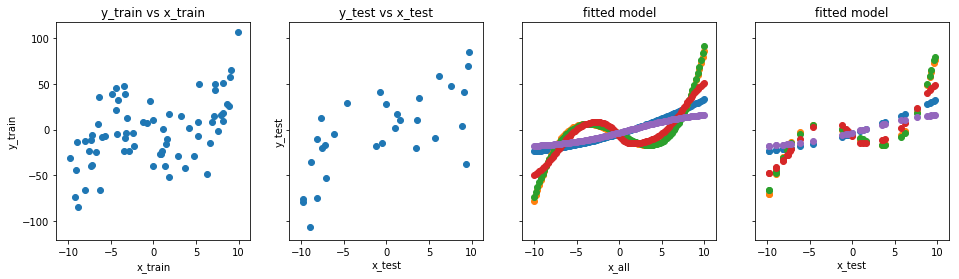

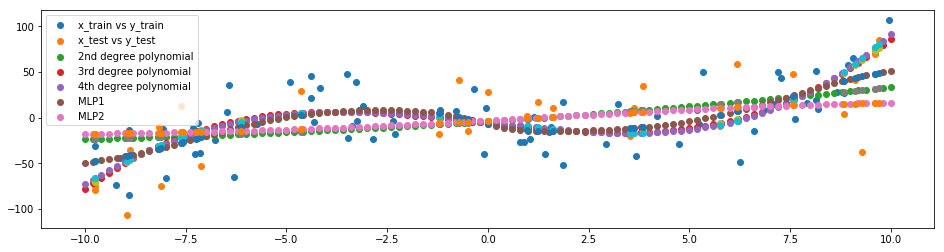

In [6]:
print ("The train errors are")
print ("Poly 2: "+str(poly_lr(2)[0]))
print ("Poly 3: "+str(poly_lr(3)[0]))
print ("Poly 4: "+str(poly_lr(4)[0]))
print ("MLP 1: "+str(MSE_train_mlp1))
print ("MLP 2: "+str(MSE_train_mlp2))
print
print ("The test errors are")
print ("Poly 2: "+str(poly_lr(2)[1]))
print ("Poly 3: "+str(poly_lr(3)[1]))
print ("Poly 4: "+str(poly_lr(4)[1]))
print ("MLP 1: "+str(MSE_test_mlp1))
print ("MLP 2: "+str(MSE_test_mlp2))
print

fig, (ax1, ax2, ax3, ax4) = subplots(nrows=1,
                                ncols=4,
                                sharex=True,
                                sharey=True,
                                figsize=(16,4))

ax1.scatter(x=x_train, y=y_train)
ax1.set_title('y_train vs x_train')
ax1.set_xlabel('x_train')
ax1.set_ylabel('y_train')

ax2.scatter(x=x_test, y=y_test)
ax2.set_title('y_test vs x_test')
ax2.set_xlabel('x_test')
ax2.set_ylabel('y_test')

ax3.scatter(x=x_all, y=poly_lr(2)[2])
ax3.scatter(x=x_all, y=poly_lr(3)[2])
ax3.scatter(x=x_all, y=poly_lr(4)[2])
ax3.scatter(x=x_all, y=predict_all_mlp1)
ax3.scatter(x=x_all, y=predict_all_mlp2)
ax3.set_title('fitted model')
ax3.set_xlabel('x_all')


ax4.scatter(x=x_test, y=poly_lr(2)[3])
ax4.scatter(x=x_test, y=poly_lr(3)[3])
ax4.scatter(x=x_test, y=poly_lr(4)[3])
ax4.scatter(x=x_test, y=predict_test_mlp1)
ax4.scatter(x=x_test, y=predict_test_mlp2)
ax4.set_title('fitted model')
ax4.set_xlabel('x_test')

fig, (ax5) = subplots(nrows=1, ncols=1, sharex=True, sharey=True,
                                figsize=(16,4))

ax5.scatter(x=x_train, y=y_train, label='x_train vs y_train')
ax5.scatter(x=x_test, y=y_test, label='x_test vs y_test')
ax5.scatter(x=x_all, y=poly_lr(2)[2], label='2nd degree polynomial')
ax5.scatter(x=x_all, y=poly_lr(3)[2], label='3rd degree polynomial')
ax5.scatter(x=x_all, y=poly_lr(4)[2], label='4th degree polynomial')
ax5.scatter(x=x_all, y=predict_all_mlp1, label='MLP1')
ax5.scatter(x=x_all, y=predict_all_mlp2, label='MLP2')
ax5.scatter(x=x_test, y=poly_lr(2)[3])
ax5.scatter(x=x_test, y=poly_lr(3)[3])
ax5.scatter(x=x_test, y=poly_lr(4)[3])
ax5.scatter(x=x_test, y=predict_test_mlp1)
ax5.scatter(x=x_test, y=predict_test_mlp2)
ax5.legend()

(c) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.

The second degree polynomial model performs the best as it has the best bias-variance measure. 

MLP1, Third order and Fourth order polynomials, have lower error when compared to the second degree model, but their out of sample (test) errors are much higher. Second order still has the second highest OOS error, but it has a relatively better bias-variance tradeoff as the difference between train and test errors is the least amongst all the models.

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


In [7]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))


#for (30)
#use - 
#for num_data_points in range(20, 1001):

#for 5) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.Generate 100 sample points  (𝑥,𝑦)  according to the above distribution. Use the np.matmul function. (2pts)

In [8]:
#Generate 100 sample points (𝑥,𝑦) according to the above distribution. Use the np.matmul function. 
w_true = np.arange(10)+1
w_true = numpy.transpose(w_true)
x = np.random.uniform(size=(100, 10))
e = np.random.normal(size=(100))
y = np.matmul(x, w_true) + e
y

array([19.38099011, 35.63238016, 27.58060541, 29.2977313 , 23.53961707,
       27.2646857 , 30.84026252, 28.45914144, 25.83562963, 16.09986568,
       22.62686844, 29.45676961, 23.17151091, 30.65449363, 32.83906022,
       34.18347622, 14.49352747, 35.10844871, 18.71208181, 17.42163153,
       29.53762095, 32.51211778, 21.08306599, 15.6138506 , 22.23709357,
       26.4398436 , 29.0443382 , 25.1098838 , 23.70761113, 37.75413441,
       21.45354888, 31.24509078, 29.24709424, 20.95725797, 31.6150098 ,
       30.91436511, 31.19547266, 24.91109097, 22.76688626, 35.26418506,
       32.44015665, 29.93383544, 24.36294668, 33.98501009, 26.79687888,
       24.17121664, 39.59057133, 32.08618487, 30.3079465 , 23.26910464,
       30.64513322, 38.89617111, 30.2890551 , 27.72729548, 27.60628129,
       21.56014257, 35.52857563, 24.19967581, 21.65264477, 34.4696578 ,
       22.01900253, 27.05716672, 27.02484742, 15.20950887, 40.58258512,
       28.86187476, 25.52145208, 34.43758608, 36.5413295 , 28.36

2. Fit a linear regression model through the above data and report the MSE. (3 pts)

In [9]:
# Fit a linear regression model through the above data and report the MSE
reg = linear_model.LinearRegression()
MLR_1 = reg.fit(x,y)
MLR_1_pred = reg.predict(x)
print("Mean square error: %.2f"
      % mean_squared_error(y, MLR_1_pred))
MLR_1.coef_

Mean square error: 0.83


array([0.64233296, 2.1258539 , 2.65427618, 4.24489063, 5.32702617,
       5.47432342, 6.82100476, 7.67767846, 9.18362309, 9.99083513])

3.Generate 50 sample points  (𝑥,𝑦)  to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)

In [10]:
#Generate 50 sample points (𝑥,𝑦) to be the test set. 
#Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and 
#plot how the MSE varies with increasing the train data. 
#At the point where the MSE is minimum, print the corresponding coefficients. 
x_test_points = np.random.uniform(size=(50, 10))
y_test_points = np.matmul(x_test_points, w_true) + np.random.normal(size=(50))

MSE = pd.DataFrame(columns=['Training_Size', 'MSE', 'Coef'])
for i in range(20,1001):
    x_train_points = np.random.uniform(size=(i, 10))
    y_train_points = np.matmul(x_train_points, w_true) + np.random.normal(size=(i))
    reg = linear_model.LinearRegression()
    MLR = reg.fit(x_train_points,y_train_points)
    test_mse = mean_squared_error(y_test_points, reg.predict(x_test_points))
    MSE = MSE.append({'Training_Size': i, 'MSE':test_mse, 'Coef' : str(MLR.coef_)},ignore_index=True)

print (MSE.head())

  Training_Size       MSE                                               Coef
0            20  0.984306  [ 0.64805427  1.4283834   3.46297096  3.613601...
1            21  2.205279  [ 1.11739987  1.07103108  4.36385071  1.834045...
2            22  0.891088  [1.74050517 2.94132603 3.23962196 3.99005573 4...
3            23  1.634161  [-0.71473469  3.94877201  2.84773779  4.187849...
4            24  0.850565  [ 0.71546535  0.91000229  2.86496855  5.041445...


['[0.62858562 1.92116348 2.8124632  3.99255537 5.05508914 5.78490251\n 7.04286469 7.86428062 8.9394076  9.79660534]']


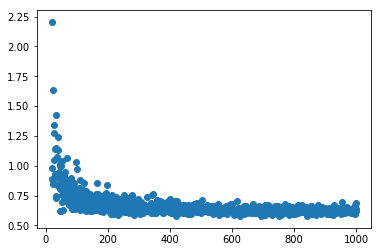

In [11]:
plt.scatter(MSE['Training_Size'], MSE['MSE'])

print (list(MSE[MSE['MSE'] == min(MSE['MSE'])]['Coef']))

4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted  𝑦  and the true  𝑦  which is commonly used. Hence,  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)=1𝑛𝑢𝑚_𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠∑𝑛𝑢𝑚_𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠𝑖=1(𝜃𝑖−𝜃̂ 𝑖)2  where  𝜃𝑖  are the true coefficients and  𝜃̂ 𝑖  are the estimated coefficients. Using the  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  as the metric, about how many data points are required to have  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate  𝑥  which is 3 dimensional (instead of 10 dimensional as before) and the corresponding  𝑦  for each  𝑥 . In this case, when  𝑥  is three dimensional, how man

In [12]:
def No_Data_Points():
    MSE_coff = 100
    i=1
    while MSE_coff>0.01:
        x_train_points = np.random.uniform(size=(i, 10))
        y_train_points = np.matmul(x_train_points, w_true) + np.random.normal(size=(i))
        reg = linear_model.LinearRegression()
        MLR2 = reg.fit(x_train_points,y_train_points)
        MSE_coff = mean_squared_error(w_true, MLR2.coef_)
        i+=1
    return i

points = []
for trials in range(1,10):
    points.append(No_Data_Points())
print ('Average data size for MSE_Coefficients to be less than 0.01 is ' + str(mean(points)))

Average data size for MSE_Coefficients to be less than 0.01 is 330.8888888888889


In [13]:
w_true3 = w_true[0:3]
def No_Data_Points():
    MSE_coff = 100
    i=1
    while MSE_coff>0.01:
        x_train_points = np.random.uniform(size=(i, 3))
        y_train_points = np.matmul(x_train_points, w_true3) + np.random.normal(size=(i))
        reg = linear_model.LinearRegression()
        MLR3 = reg.fit(x_train_points,y_train_points)
        MSE_coff = mean_squared_error(w_true3, MLR3.coef_)
        i+=1
    return i

points = []
for trials in range(1,10):
    points.append(No_Data_Points())
print ('Average data size for MSE_Coefficients to be less than 0.01 is ' + str(mean(points)))

Average data size for MSE_Coefficients to be less than 0.01 is 82.55555555555556


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

###### PctEmploy and PctUnemployed
The percentage employed and unemployed columns have missing values in 99 rows:

(1). They can be imputed in more than one way: Out of the mean, median and mode - median can be a better measure becase
a. The mean is hardly a good estimate of a data distribution, unless it is normal. It is a point estimate which could be easily skewed by rest of the data b. Mode may assume that the rows with missing values are similar to the rest of the data and reduce the variance which can be potentially explained

(2) The second method maybe using a conditional mean/median using the median income / per capita income. Hypothesis is that the higher income regions are likely to have less unemployed people. A plot can be looked at to directionally validate the hypothesis and then the conditional mean/median can be imputed. 

Single variable prediction models can be built to check how this changes the accuracy, but since the number of rows is less, this wouldn't affect the accuracy as much. (We validated using a single variable model using each of the methods. Not included here because of redundancy in code). Eventhough there isn't much difference, still going ahead with the conditional mean approach as it does capture more variation (as seen in the sample rows below: Compare PctEmploy_Imp and PctEmploy_Imp2)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('q3_dataset.csv')
X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

In [15]:
#Method 1: Substituting the median
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)
dataset['PctEmploy'].median #0.68
dataset['PctEmploy_Imp']=dataset['PctEmploy'].fillna(value=0.68)


C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is t

,ViolentCrimesPerPop,PolicBudgPerPop,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PolicCars,PctUnemployed,PctEmploy,PctEmploy_Imp,inc_buck,PctEmploy_Imp2
30,0.16,NaN,0.01,0.30,0.00,0.00,0.16,0.25,0.04,0.07,NaN,NaN,NaN,0.68,"(0.0, 0.2]",0.318531
42,0.80,NaN,0.00,0.45,0.02,1.00,0.16,0.16,0.01,0.30,NaN,NaN,NaN,0.68,"(0.0, 0.2]",0.318531
46,0.20,NaN,0.03,NaN,0.03,0.68,0.47,0.30,0.17,0.04,NaN,NaN,NaN,0.68,"(0.32, 0.49]",0.586161
77,0.68,0.12,0.08,0.43,0.09,0.99,0.11,0.15,0.22,0.06,0.04,NaN,NaN,0.68,"(0.0, 0.2]",0.318531
87,0.10,NaN,0.02,0.04,0.04,1.00,0.35,0.71,0.03,0.18,NaN,NaN,NaN,0.68,"(0.32, 0.49]",0.586161


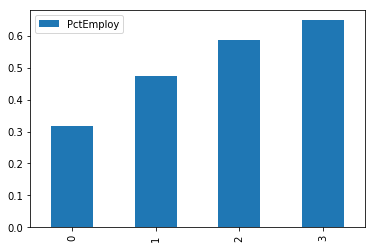

In [16]:
#Method 2 - Substituting the conditional mean after checking for relationship between income and employment
#The graph indicates that the employment is related to income information.  
#The sample rows show the increased variation that can be captured due to the conditional mean calculation
i25=np.percentile(dataset['medIncome'],25) #0.2
i50=np.percentile(dataset['medIncome'],50) #0.32
i75=np.percentile(dataset['medIncome'],75) #0.49
i90=np.percentile(dataset['medIncome'],90) #0.65
dataset['inc_buck'] = pd.cut(x=dataset['medIncome'], bins=[0,0.2,0.32,0.49,0.65])
df_bucket=dataset.groupby(['inc_buck'])['PctEmploy'].mean().to_frame().reset_index()
df_bucket.plot(kind='bar')
dataset['PctEmploy_Imp2']=dataset['PctEmploy']
dataset['PctEmploy_Imp2'][(dataset['medIncome']<=0.2) & (dataset['PctEmploy'].isnull())]=0.318531
dataset['PctEmploy_Imp2'][(dataset['medIncome']>0.2) & (dataset['medIncome']<=0.32)&(dataset['PctEmploy'].isnull())]=0.473776
dataset['PctEmploy_Imp2'][(dataset['medIncome']>0.32) & (dataset['medIncome']<=0.49)&(dataset['PctEmploy'].isnull())]=0.586161
dataset['PctEmploy_Imp2'][(dataset['medIncome']>0.49)&(dataset['PctEmploy'].isnull())]=0.647704
dataset['PctEmploy_Imp2'].fillna(0.68)
dataset[dataset['PctEmploy_Imp2'].isnull()]
dataset[dataset['PctEmploy'].isnull()][:5]

##### Population, Household size and Number of urban households 
Population may be imputed from the 'PopDens', Population Density column using the conditional mean approach provided there exists a relationship. 

Intuitively, household size and number of urban households don't have variables which can be used to derive missing values. Hence going ahead with the median approach


In [18]:
#Household size and Number of households replacement using median
dataset['householdsize'].median #0.33
dataset['householdsize']=dataset['householdsize'].fillna(value=0.33)
dataset['numbUrban'].median #0.20
dataset['numbUrban']=dataset['numbUrban'].fillna(value=0.20)

C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harit\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is t

,ViolentCrimesPerPop,PolicBudgPerPop,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PolicCars,PctUnemployed,PctEmploy,PctEmploy_Imp,inc_buck,PctEmploy_Imp2,PopDens_buck,Pop_Imp
0,0.20,0.14,0.19,0.33,0.20,1.0,0.37,0.40,0.12,0.26,0.06,0.27,0.68,0.68,"(0.32, 0.49]",0.68,"(0.17, 0.28]",0.190000
1,0.67,NaN,0.00,0.16,0.02,1.0,0.31,0.37,0.02,0.12,NaN,0.27,0.73,0.73,"(0.2, 0.32]",0.73,"(0.1, 0.17]",0.000000
2,0.43,NaN,NaN,0.42,0.00,0.0,0.30,0.27,0.01,0.21,NaN,0.36,0.58,0.58,"(0.2, 0.32]",0.58,"(0.17, 0.28]",0.074111
3,0.12,NaN,0.04,0.77,0.06,1.0,0.58,0.36,0.02,0.39,NaN,0.33,0.71,0.71,"(0.49, 0.65]",0.71,"(0.28, 0.49]",0.040000
4,0.03,NaN,0.01,0.55,0.02,0.9,0.50,0.43,0.04,0.09,NaN,0.12,0.65,0.65,"(0.49, 0.65]",0.65,"(0.0, 0.1]",0.010000


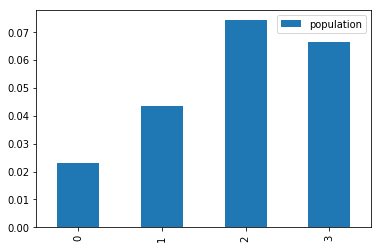

In [19]:
#Population: Relationship between population and population density
i25=np.percentile(dataset['PopDens'],25) #0.1
i50=np.percentile(dataset['PopDens'],50) #0.17
i75=np.percentile(dataset['PopDens'],75) #0.28
i90=np.percentile(dataset['PopDens'],90) #0.49
dataset['PopDens_buck'] = pd.cut(x=dataset['PopDens'], bins=[0,0.1,0.17,0.28,0.49])
df_bucket1=dataset.groupby(['PopDens_buck'])['population'].mean().to_frame().reset_index()
df_bucket1.plot(kind='bar')
df_bucket1 

dataset['Pop_Imp']=dataset['population']
dataset['Pop_Imp'][(dataset['PopDens']<=0.1) & (dataset['population'].isnull())]=0.022957
dataset['Pop_Imp'][(dataset['PopDens']>0.1) & (dataset['PopDens']<=0.17)&(dataset['population'].isnull())]=0.043507
dataset['Pop_Imp'][(dataset['PopDens']>0.17) & (dataset['PopDens']<=0.28)&(dataset['population'].isnull())]=0.074111
dataset['Pop_Imp'][(dataset['PopDens']>0.28)&(dataset['population'].isnull())]=0.066208
dataset['Pop_Imp'].fillna(0.19)
dataset[:5]

###### PoliceBudgPerPop and PolicCars
PoliceBudgPerPop and PolicCars - Ideally, we can ignore these two columns and not consider them for analysis because of the 2 following reasons: 

(i) They have 84% missing data. 16% is very less coverage and cannot be expected to capture variability in the data

(ii) It is information about police cars / #police which cannot be derived from any other columns in the dataset, as the other columns contain information about demographics of the city/region.  

BUT, we are still trying to impute the variable using a regression model over rest of the independent variables. As seen below, it doesn't yield any benefit (expected). 

However, using the median approach to impute this variable and not ignoring it since the available information is anyway less. Using model performance as an evaluation parameter, not ignoring these variables provides a better accuracy. 

In [20]:
from sklearn import neighbors
Xf = dataset.drop(['ViolentCrimesPerPop','PopDens_buck','inc_buck','population','PctEmploy','PctEmploy_Imp'],axis=1)
Xf['PctUnemployed'].median #0.27
Xf['PolicBudgPerPop'].median #0.14
Xf['PolicCars'].median #0.06
Xf['PctUnemployed']=Xf['PctUnemployed'].fillna(0.27)
Xf['PolicBudgPerPop']=Xf['PolicBudgPerPop'].fillna(0.14)
Xf['PolicCars']=Xf['PolicCars'].fillna(0.06)
Xp=Xf
Xp['police']=dataset['PolicBudgPerPop']
Xp1=Xp[Xp['police'].notnull()]
Yp=Xp1['police']
Xp2=Xp1.drop(['police'],axis=1)

regp=linear_model.LinearRegression()
police=regp.fit(Xp2,Yp)
Xp3=Xp[Xp['police'].isnull()]
Xp4=Xp3.drop(['police'],axis=1)
pol_pred=police.predict(Xp4)

knn = neighbors.KNeighborsRegressor(5, weights='distance')
pol_pred_new = knn.fit(Xp2,Yp).predict(Xp4)

print ('max of prediction ' + str(max(pol_pred_new )))
print ('min of prediction ' + str(min(pol_pred_new )))
mean(pol_pred_new)

max of prediction 0.48519770360321396
min of prediction 0.06095510113909792


0.22497626475486301

##### Pre and Post treatment Accuracy comparison
Since the 'pre treatment' model will throw an error because of NaNs, using the brute force method as the 'pre treatment'.

That is, using the 'mean' of every column as a substitute

Mean squared error after pre-processing:0.031431954172562795
Mean squared error before pre-processing:0.0358068427786044


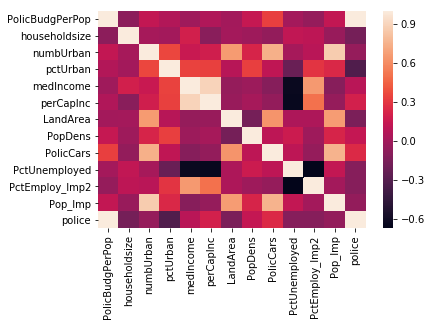

In [21]:
#Model with pre-processed data
dataset1=dataset[dataset['PctEmploy'].notnull()]
Xft = dataset1.drop(['ViolentCrimesPerPop','PopDens_buck','inc_buck','population','PctEmploy','PctEmploy_Imp'],axis=1)
#Xft=Xf[Xf['Pct'].notnull()]
#Xf['PctUnemployed'].median #0.27
#Xft['PolicBudgPerPop'].median #0.14
#Xft['PolicCars'].median #0.06
#Xf['PctUnemployed']=Xf['PctUnemployed'].fillna(0.27)
Xft['PolicBudgPerPop']=Xf['PolicBudgPerPop'].fillna(0.14)
Xft['PolicCars']=Xf['PolicCars'].fillna(0.06)

Corr=Xf.corr()
import seaborn as sns
sns.heatmap(Corr)

Yft = dataset[dataset['PctUnemployed'].notnull()]['ViolentCrimesPerPop']

Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(Xft,Yft,test_size = 0.30, random_state=11)
regf = linear_model.LinearRegression()
preproc = reg.fit(Xf_train,Yf_train)
Yf_pred=preproc.predict(Xf_test)
print ('Mean squared error after pre-processing:' + str(mean_squared_error(Yf_pred,Yf_test)))

#Model without pre-processed data (using brute force 'mean' approach as the code throws an error with NaNs) 
df = pd.read_csv('q3_dataset.csv')
df['population'].mean() #0.056
df['population']=df['population'].fillna(0.056)
df['PctEmploy'].mean() #0.501
df['PctEmploy']=df['PctEmploy'].fillna(0.501)
df['PolicBudgPerPop'].mean() #0.374
df['PolicBudgPerPop']=df['PolicBudgPerPop'].fillna(0.374)
df['PolicCars'].mean() #0.163
df['PolicCars']=df['PolicCars'].fillna(0.163)
df['householdsize'].mean() #0.464
df['householdsize']=df['householdsize'].fillna(0.464)
df['numbUrban'].mean() #0.066
df['numbUrban']=df['numbUrban'].fillna(0.066)
df['PctUnemployed'].mean() #0.363
df['PctUnemployed']=df['PctUnemployed'].fillna(0.363)

Xb = df.drop(['ViolentCrimesPerPop'],axis=1)
Yb = df['ViolentCrimesPerPop']
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split(Xb,Yb,test_size = 0.30, random_state=11)
regb = linear_model.LinearRegression()
preprocb = reg.fit(Xb_train,Yb_train)
Yb_pred=preprocb.predict(Xb_test)
print ('Mean squared error before pre-processing:' + str(mean_squared_error(Yb_pred,Yb_test)))

###### The MSE has come down marginally after pre-processing. But here both the approaches have some form of pre-processing. This just goes to prove that there can be improvements (though marginal) when missing data is carefully treated on a case to case basis. The difference will be appreciated more in larger datasets, with more information, and more missing data. 

# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer: False. PCA creates linear components of the p-dimensions in the dataset by retaining the maximum possible variance in the individual dimensions, preserving the orthogonality thereby reducing multicollinearity in the data. 

The lowering of multicollinearity, may lead to a better prediction of the output variable, where PCA is used as a pre-processing step for regression. 

Since PCA is unsupervised, it is just focused on reconstruction of the dimensions than maximizing the accuracy of prediction post that.